# 04 Predicting from Data with Machine Learning in Python

<center><img src="figs/03_class_header.png" width=1050px alt="default"/></center>

### Feedback about the class!

https://forms.gle/GQfk59CJZnELZfJQ6

# Outline of ECE 3

- Unit 01: Welcome to Python
- Unit 02: Computing with Data in Python
- Unit 03: Summarizing Data in Python
- **Unit 04: Predicting from Data with Machine Learning in Python**

### Artificial Intelligence (AI)

Before defining machine learning, we need to define artificial intelligence. We will see that machine learning is a subfield of artificial intelligence.

$\color{#EF5645}{\text{Definition}}$: Artificial Intelligence (AI) represents the techniques that enable machines to mimic human intelligence.

$\color{#047C91}{\text{Example}}$: We can hard-code a chess strategy in a computer, by a decision tree deciding what is the best move for the computer given a situation on the board.



In May of 1997, Garry Kasparov sat down at a chess board in a Manhattan skyscraper. Kasparov was considered the best chess player of all times. He was playing with an AI called Deep Blue. Deep Blue was one of the world’s most powerful supercomputers, built by IBM with a specific goal in mind: to beat humanity at its own game. 

For IBM, billions of dollars worth of business clout was on the table, and to a certain extent, Kasparov was playing for the fate of chess itself. He had never lost a multi-game match in his entire career. Could a machine beat him? It did.

<center><img src="figs/04_deep_blue.png" width=420px alt="default"/></center>

### Machine Learning (ML)

Machine learning is a form of artificial intelligence that uses data.

$\color{#EF5645}{\text{Definition}}$: Machine Learning (ML) represents the techniques that enable machines to mimic human intelligence by learning from data.

$\color{#047C91}{\text{Example}}$: The computer has learned what is the next best move, by looking at millions of a given game: Chess... or Go.

$\color{#EF5645}{\text{Remark}}$: ML is therefore a sub-field of AI.

In March 2016, AlphaGo defeated the world Go champion. AlphaGo is a program that was trained to play the board game Go by looking at a huge number of Go games.

AlphaGo's victory was a major milestone. Go had previously been regarded as a hard problem in machine learning that was expected to be out of reach for the technology of the time.

AlphaGo had taught itself how to improve its game by playing millions of matches against itself, according to the head of the Google subsidiary that developed the software.


<center><img src="figs/04_alpha_go.png" width=550px alt="default"/></center>

### ML: Supervised Learning and Unsupervised Learning

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

### Supervised Learning in ML


$\color{#EF5645}{\text{Definition}}$: _Supervised learning_ refers to the task of learning a function that maps an input $X$ to an output $Y$ based on examples of input-outputs. The method is:
- a _classification_ if outputs are categorical, (e.g., predict if a patient has Alzheimer's from its MRI)
- a _regression_ if quantitative (e.g., predict the age of a patient from its MRI).

<center><img src="figs/03_sl2.png" width=900px alt="default"/></center>
<center>Supervised Learning</center>

### Unsupervised Learning in ML

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters), (e.g. find the different diseases that exist within one dataset of brain images),
- a _dimension reduction_: if we want to find the main sources of data variations (e.g., what are the main variations in the shape of a brain?)

<center>  </center>
<center><img src="figs/04_ai.png" alt="default" width=1900px/></center>


# Outline of 04: Predicting from Data

- **04: Predicting from Data with Machine Learning in Python**
  - **A. Clustering**
  - B. Linear Regression
  - C. Principal Component Analysis

### Understand the Fundamentals Behind Clustering

### Clustering: Goal (Intuition)

Clustering is an unsupervised machine learning approach, whose goal can be summarized as follows.

- Given: (i) $N$ $n$-vectors $x_1, . . . , x_N$ representing $N$ data points, (ii) integer $k$.
- $\color{#EF5645}{\text{Goal}}$:
  - Group/Cluster $N$ $n$-vectors into $k$ groups/clusters
  - _such that_: vectors in the same group are "close".

<center><img src="figs/04_clustering.jpg" alt="default" width=380px/></center>

$\color{#047C91}{\text{Exercise}}$: What is $k$ in the figure above? $n$? $N$?

### Examples of clustering

There are many real-worlds examples of the use of clustering.

- patient clustering 
  - $x_i$ is the brain image of patient $i$
- customer market "segmentation" (clustering)
  - $x_i$ is purchase history of customer $i$ 
- financial sectors clustering
  - $x_i$ are financial attributes of company $i$


### K-means algorithm

The K-means algorithm is a way of performing clustering.

<center><img src="figs/04_it0.png" alt="default"/></center>

<center><img src="figs/04_it1.png" alt="default"/></center>

<center><img src="figs/04_it2.png" alt="default"/></center>

<center><img src="figs/04_it3.png" alt="default"/></center>

<center><img src="figs/04_it5.png" alt="default"/></center>

### Clustering: Goal (Math)

Let's restate the goal of clustering using mathematics, so that we can implement it.

First, define notations:

- For each group/cluster $j=1, ..., k$: 
  - Group $G_j$: Set of indices in $1, ..., N$ (data points)
  - Representative $z_j$: typical element of $G_j$.
- For each data point $i=1,...,N$: 
  - Assignment $c_i$: $x_i$ is in $G_{c_i}$

$\color{#EF5645}{\text{Goal}}$: Find $c_i$, $z_j$ to minimize 
$J = \frac{1}{N}\sum_{i=1}^N ||x_i - z_{c_i}||^2$
, i.e. the mean square distance from vectors to their representatives.


The K-means algorithm reaches this goal by iterations that:
- Alternate between:
  - (i) update groups, i.e., assignments $c_1, ..., c_N$, 
  - (ii) update representatives $z_1, ..., z_k$.
  
- Such that the objective $J$ decreases at each step.

We iterate until the representatives $z_j$’s stop changing.

In [30]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Create data points X

(30, 2)


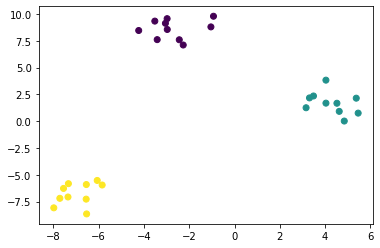

In [53]:
X, true_assignments = make_blobs(n_samples=30, centers=3, random_state=42)
plt.scatter(x=X[:, 0], y=X[:, 1], c=true_assignments);
print(X.shape)

### Initialize representatives by taking 3 data points

In [32]:
representatives = [X[0], X[1], X[2]]

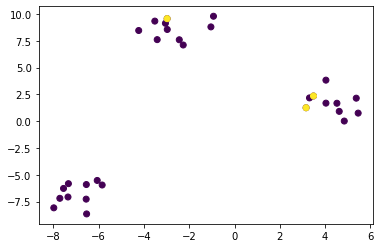

In [33]:
plt.scatter(
    x=[x[0] for x in X] + [z[0] for z in representatives], 
    y=[x[1] for x in X] + [z[1] for z in representatives], 
    c=[0 for x in X] + [4 for z in representatives]);

Let's define an auxiliary plotting function that we will use later.

In [34]:
def plot_representatives_and_assignments(X, point_assigments, representatives):
    plt.scatter(
        x=[x[0] for x in X] + [z[0] for z in representatives], 
        y=[x[1] for x in X] + [z[1] for z in representatives], 
        c=list(point_assigments) + [4 for z in representatives])
    plt.show()

### (i) Update the groups

We give details on each step of the algorithm. First, updating the groups.

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign each data point $x_i$ to a group, i.e., choose $c_1, ..., c_N$
  - Assign each $x_i$ to its nearest representative.


In [58]:
X_per_cluster = [[], [], []] # Will become [G1, G2, G3]
assignments = []  # Will become: c1, ..., cN
print(X.shape)
for x in X:
    dists_to_representatives = [np.linalg.norm(x - z) for z in representatives]
    c = np.argmin(dists_to_representatives)
    assignments.append(c)
    X_per_cluster[c].append(x)
np.mean(X_per_cluster[0], axis=0)

(30, 2)


array([-1.78324231,  1.16475013])

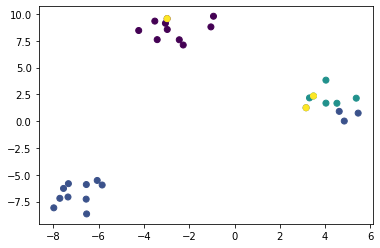

In [41]:
plot_representatives_and_assignments(X, assignments, representatives)

### (ii) Update the representatives

Next, we give details on how we update the representatives.

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = mean of the points in group $j$.


In [45]:
representatives[0] = np.mean(X_per_cluster[0], axis=0)
representatives[1] = np.mean(X_per_cluster[1], axis=0)
representatives[2] = np.mean(X_per_cluster[2], axis=0)

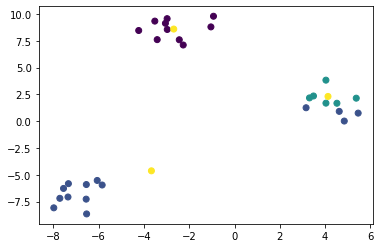

In [46]:
plot_representatives_and_assignments(X, assignments, representatives)

In [55]:
def k_means(X, k, show_plot):
    representatives = np.array(X[:k])
    distance_between_iterates = 10

    while distance_between_iterates > 0.1:
        current_representatives = np.copy(representatives)
        X_per_cluster = [[]] * k  # will become [G1, G2, G3]
        assignments = []  # will become [c1, ..., cN]

        for x in X:
            dists = [np.linalg.norm(x - z) for z in representatives]
            c = np.argmin(dists)
            assignments.append(c)
            X_per_cluster[c].append(x)

        for j in range(k):
            representatives[j] = np.mean(X_per_cluster[j], axis=0)
            
        distance_between_iterates = np.linalg.norm(
            current_representatives - representatives)
        if show_plot:
            plot_representatives_and_assignments(
                X, assignments, representatives)
    return representatives, assignments

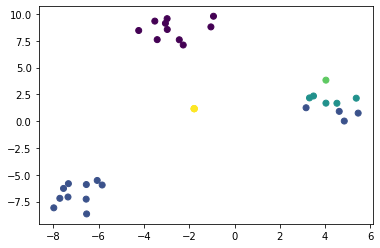

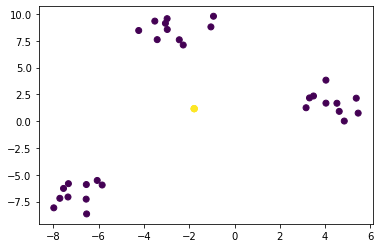

In [56]:
representatives, assignments = k_means(X, 4, True)

- $\color{#EF5645}{\text{Remarks}}$:
  - $J$ decreases at each step, 
  - but final clustering might not minimize $J$
    - it might only be a _local_ minimum.
    
- $\color{#EF5645}{\text{Recommendation}}$:
  - Run $k$-means 10 times, with different initial representatives
  - Take as final partition the one with smallest $J$

### Connectome Dataset: Use Clustering to Find Diseases

Consider a brain divided into 28 different areas. A connectome associated with this brain is a matrix $A$ such that $A_{ij}$ quantifies whether area $i$ and area $j$ tend to be activated together.

$\color{#EF5645}{\text{Question}}$: We have a dataset of 86 connectomes where some belong to healthy patients, and others to schizophrenic patients. We want to group the connectomes into two clusters.

<center><img src="figs/03_parcellation.png" width=400px alt="default"/></center>

<center>A brain divided into several areas.</center>

We use an auxiliary package, called geomstats, to import a connectome dataset. The 86 connectomes are in the `data` variable. We plot them.

INFO: Using numpy backend


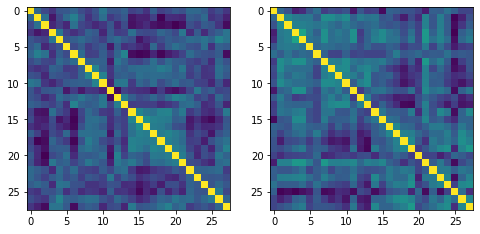

In [12]:
import geomstats.datasets.utils as data_utils
data, _, labels = data_utils.load_connectomes()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121); imgplot = ax.imshow(data[0])
ax = fig.add_subplot(122); imgplot = ax.imshow(data[1])

### Apply the K-means algorithm

First, convert every data point (connectome, i.e., matrix with 28 rows and 28 columns) into a vector (of size $28\times28=784$) using the function reshape. Then, we run our k-means function.

In [13]:
print(data.shape)
X_connectome = data.reshape((86, 28*28))
print(X_connectome.shape)
representatives, assignments = k_means(X_connectome, k=2, show_plot=False)

(86, 28, 28)


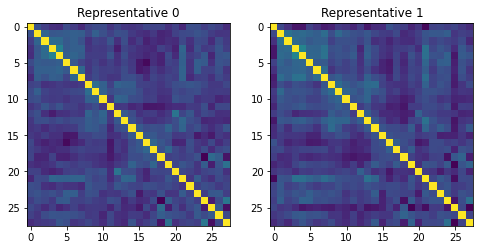

In [18]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121); imgplot = ax.imshow(representatives[0].reshape(28, 28)); ax.set_title("Representative 0")
ax = fig.add_subplot(122); imgplot = ax.imshow(representatives[1].reshape(28, 28)); ax.set_title("Representative 1");

We have found the two groups of patients !

### Questions on Clustering

- **04: Predicting from Data with Machine Learning in Python**
  - **A. Clustering**
  - B. Linear Regression
  - C. Principal Component Analysis